***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [1. Radio Science using Interferometric Arrays](01_00_introduction.ipynb)
    * Previous: [1.8 Astronomical radio sources](01_08_astronomical_radio_sources.ipynb)
    * Next: [1.10 The Limits of Single Dish Astronomy](01_09_a_brief_introduction_to_interferometry.ipynb)
***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [2]:
from IPython.display import display
from ipywidgets import interact

In [3]:
HTML('../style/code_toggle.html')

## 1.9 A brief introduction to interferometry and its history

### 1.9.1 The double-slit experiment

The basics of interferometry date back to Thomas Young's [double-slit experiment &#10548;](https://en.wikipedia.org/wiki/Double-slit_experiment) of 1801. In this experiment, a plate pierced by two parallel slits is illuminated by a monochromatic source of light. Due to the wave-like nature of light, the waves passing through the two slits *interfere*, resulting in an *interference pattern*, or *fringe*, projected onto a screen behind the slits:

<img src="figures/514px-Doubleslit.svg.png" width="50%"/>
**Figure 1.9.1:** *Schematic diagram of Young's double-slit experiment. Credit: Unknown.*

The position on the screen $P$ determines the phase difference between the two arriving wavefronts. Waves arriving in phase interfere constructively and produce bright strips in the interference pattern. Waves arriving out of phase interfere destructively and result in dark strips in the pattern.

In this section we'll construct a toy model of a dual-slit experiment. Note that this model is not really physically accurate, it is literally just a "toy" to help us get some intuition for what's going on. A proper description of interfering electromagnetic waves will follow later. 

Firstly, a monochromatic electromagnetic wave of wavelength $\lambda$ can be described by at each point in time and space as a complex quantity i.e. having an amplitude and a phase, $A\mathrm{e}^{\imath\phi}$. For simplicity, let us assume a constant amplitude $A$ but allow the phase to vary as a function of time and position.

Now if the same wave travels along two paths of different lengths and recombines at point $P$, the resulting electric field is a sum:

$E=E_1+E_2 = A\mathrm{e}^{\imath\phi}+A\mathrm{e}^{\imath(\phi-\phi_0)},$

where the phase delay $\phi_0$ corresponds to the pathlength difference $\tau_0$:

$\phi_0 = 2\pi\tau_0/\lambda.$

What is actually "measured" on the screen, the ***brightness***, is, physically, a time-averaged electric field intensity $EE^*$, where the $^*$ represents complex conjugation (this exactly what our eyes, or a photographic plate, or a detector in the camera perceive as "brightness"). We can work this out as

$
EE^* = (E_1+E_2)(E_1+E_2)^* = E_1 E_1^* + E_2 E_2^* + E_1 E_2^* + E_2 E_1^* = A^2 + A^2 
+ A^2 \mathrm{e}^{\imath\phi_0}
+ A^2 \mathrm{e}^{-\imath\phi_0} =
2A^2 + 2A^2 \cos{\phi_0}.
$

Note how phase itself has dropped out, and the only thing that's left is the phase delay $\phi_0$. The first part of the sum is constant, while the second part, the ***interfering term***, varies with phase difference $\phi_0$, which in turn depends on position on the screen $P$. It is easy to see that the resulting intensity $EE^*$ is a purely real quantity that varies from 0 to $4A^2$. This is exactly what produces the alternating bright and dark stripes on the screen.


### 1.9.2 A toy double-slit simulator

Let us write a short Python function to (very simplistically) simulate a double-slit experiment. Note, understanding the code presented is not a requirement to understand the experiment. Those not interested in the code implementation should feel free to look only at the results.

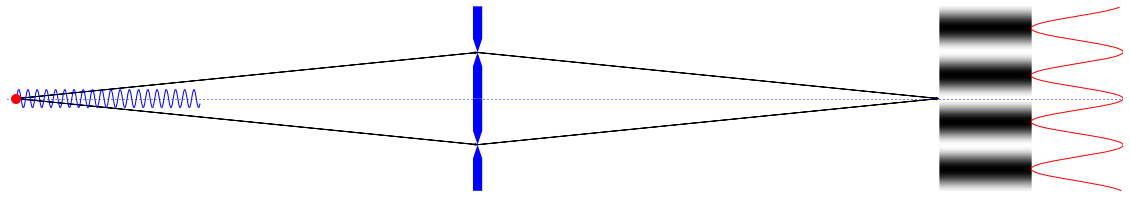

In [4]:
def double_slit (p0=[0],a0=[1],baseline=1,d1=5,d2=5,wavelength=.1,maxint=None):
    """Renders a toy dual-slit experiment.
    'p0' is a list or array of source positions (drawn along the vertical axis)
    'a0' is an array of source intensities 
    'baseline' is the distance between the slits 
    'd1' and 'd2' are distances between source and plate and plate and screen
    'wavelength' is wavelength
    'maxint' is the maximum intensity scale use to render the fringe pattern. If None, the pattern
       is auto-scaled. Maxint is useful if you want to render fringes from multiple invocations
       of double_slit() into the same intensity scale, i.e. for comparison.
    """
    ## setup figure and axes
    plt.figure(figsize=(20, 5))
    plt.axes(frameon=False)
    plt.xlim(-d1-.1, d2+2) and plt.ylim(-1, 1)
    plt.xticks([]) and plt.yticks([])
    plt.axhline(0, ls=':')
    baseline /= 2.
    ## draw representation of slits
    plt.arrow(0, 1,0, baseline-1, lw=0, width=.1, head_width=.1, length_includes_head=True)
    plt.arrow(0,-1,0, 1-baseline, lw=0, width=.1, head_width=.1, length_includes_head=True)
    plt.arrow(0, 0,0,  baseline,  lw=0, width=.1, head_width=.1, length_includes_head=True)
    plt.arrow(0, 0,0, -baseline,  lw=0, width=.1, head_width=.1, length_includes_head=True)
    ## draw representation of lightpath from slits to centre of screen
    plt.arrow(0, baseline,d2,-baseline, length_includes_head=True)
    plt.arrow(0,-baseline,d2, baseline, length_includes_head=True)
    ## draw representation of sinewave from the central position
    xw = np.arange(-d1, -d1+(d1+d2)/4, .01)
    yw = np.sin(2*np.pi*xw/wavelength)*.1 + (p0[0]+p0[-1])/2
    plt.plot(xw,yw,'b')
    ## 'xs' is a vector of x cordinates on the screen
    ## and we accumulate the interference pattern for each source into 'pattern'
    xs = np.arange(-1, 1, .01) 
    pattern = 0
    total_intensity = 0
    ## compute contribution to pattern from each source position p
    for p,a in np.broadcast(p0,a0):
        plt.plot(-d1, p, marker='o', ms=10, mfc='red', mew=0)
        total_intensity += a
        if p == p0[0] or p == p0[-1]:
            plt.arrow(-d1, p, d1, baseline-p, length_includes_head=True)
            plt.arrow(-d1, p, d1,-baseline-p, length_includes_head=True)
        # compute the two pathlenghts
        path1 = np.sqrt(d1**2 + (p-baseline)**2) + np.sqrt(d2**2 + (xs-baseline)**2)
        path2 = np.sqrt(d1**2 + (p+baseline)**2) + np.sqrt(d2**2 + (xs+baseline)**2)
        diff = path1 - path2
        # caccumulate interference pattern from this source
        pattern = pattern + a*np.cos(2*np.pi*diff/wavelength) 
    maxint = maxint or total_intensity
    # add fake axis to interference pattern just to make it a "wide" image
    pattern_image = pattern[:,np.newaxis] + np.zeros(10)[np.newaxis,:]
    plt.imshow(pattern_image, extent=(d2,d2+1,-1,1), cmap=plt.gray(), vmin=-maxint, vmax=maxint)
    # make a plot of the interference pattern
    plt.plot(d2+1.5+pattern/(maxint*2), xs, 'r')
    plt.show()
# show patern for one source at 0
double_slit(p0=[0])

This function draws a double-slit setup, with a light source at position $p$ (in fact the function can render multiple sources, but we'll only use it for one source for the moment). The dotted blue line shows the optical axis ($p=0$). The sine wave (schematically) shows the wavelength. (Note that the units here are arbitrary, since it is only geometry relative to wavelength that determines the results). The black lines show the path of the light waves through the slits and onto the screen at the right. The strip on the right schematically renders the resulting interference pattern, and the red curve shows a cross-section through the pattern.

Inside the function, we simply compute the pathlength difference along the two paths, convert it to phase delay, and render the corresponding interference pattern. 

<div class=warn>
<b>Warning:</b> Once again, let us stress that this is just a "toy" rendering of an interferometer. It serves to demonstrate the basic principles, but it is not physically accurate. In particular, it does not properly model diffraction or propagation. Also, since astronomical sources are effectively infinitely distant (compared to the size of the interferometer), the incoming light rays should be parallel (or equivalently, the incoming wavefront should be planar, as in the first illustration in this chapter).
</div>

### 1.9.3 Playing with the baseline

First of all, note how the properties of the interference pattern vary with *baseline* $B$ (the distance between the slits) and wavelength $\lambda$. Use the sliders below to adjust both. Note how increasing the baseline increases the frequency of the fringe, as does reducing the wavelength. 

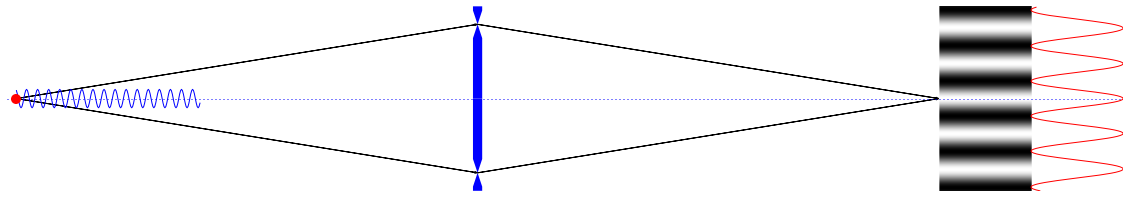

In [5]:
interact(lambda baseline,wavelength:double_slit(p0=[0],baseline=baseline,wavelength=wavelength),
                baseline=(0.1,2,.01),wavelength=(.05,.2,.01)) and None

### 1.9.4 From the double-slit box to an interferometer

The original double-slit experiment was conceived as a demonstration of the wave-like nature of light. The role of the light source in the experiment was simply to illuminate the slits. Let us now turn it around and ask ourselves, given a working dual-slit setup, could we use it to obatin some information about the light source? Could we use the double-slit experiment as a measurement device, i.e. an *interferometer*?

#### 1.9.4.1 Measuring source position

Obviously, we could measure source intensity -- but that's not very interesting, since we can measure that by looking at the source directly. Less obviously, we could measure the source position. Observe what happens when we move the source around, and repeat this experiment for longer and shorter baselines:

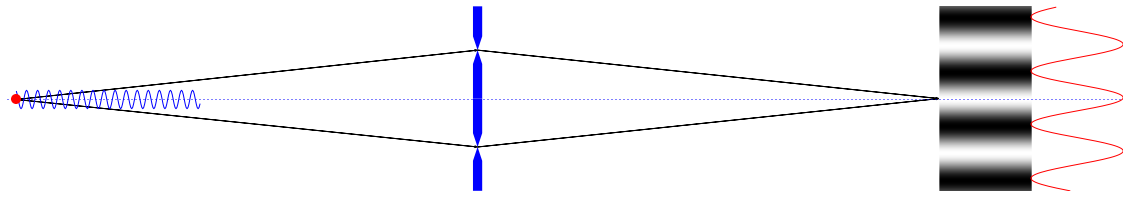

In [6]:
interact(lambda position,baseline,wavelength:double_slit(p0=[position],baseline=baseline,wavelength=wavelength),
               position=(-1,1,.01),baseline=(0.1,2,.01),wavelength=(.05,.2,.01)) and None

Note that long baselines are very sensitive to change in source position, while short baselines are less sensitive. As we'll learn in Chapter 4, the spatial resolution (i.e. the distance at which we can distinguish sources) of an interfrometer is given by $\lambda/B$ , while the spatial resolution of a conventional telescope is given by $\lambda/D$, where $D$ is the dish (or mirror) aperture. This is a fortunate fact, as in practice it is much cheaper to build long baselines than large apertures!

On the other hand, due to the periodic nature of the interference pattern, the position measurement of a long baseline is ambiguous. Consider that two sources at completely different positions produce the same interference pattern:

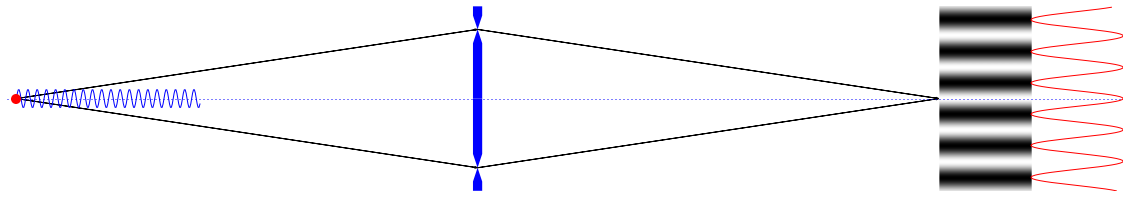

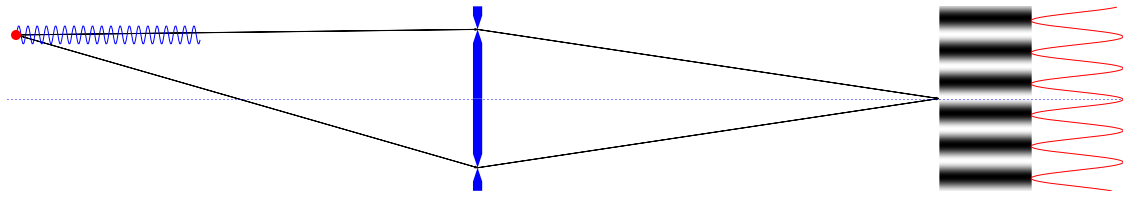

In [7]:
double_slit([0],baseline=1.5,wavelength=0.1)
double_slit([0.69],baseline=1.5,wavelength=0.1)

On the other hand, using a shorter baseline resolves the ambiguity:

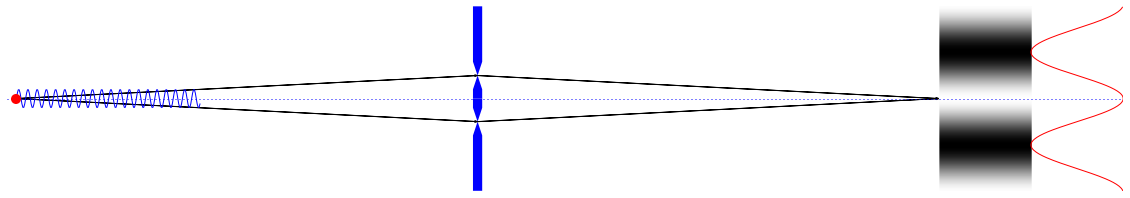

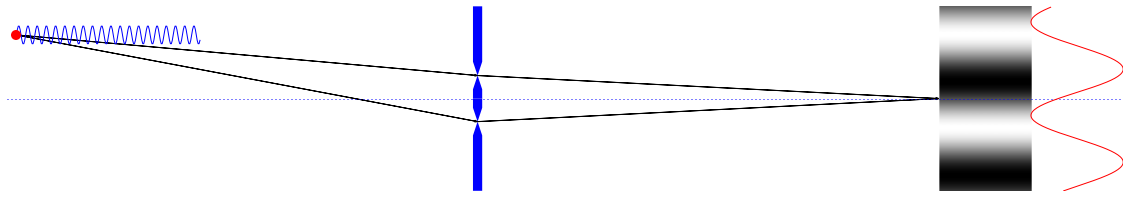

In [8]:
double_slit([0],baseline=0.5,wavelength=0.1)
double_slit([0.69],baseline=0.5,wavelength=0.1)

Modern interferometers exploit this by using an array of elements, which provides a whole range of possible baselines. 

#### 1.9.4.2 Measuring source size

Perhaps less obviously, we can use an inteferometer to measure source size. Until now we have been simulating only point-like sources. First, consider what happens when we add a second source to the experiment (fortunately, we wrote the function above to accommodate such a scenario). The interference pattern from two (independent) sources is the sum of the individual interference patterns. This seems obvious, but will be shown more formally later on. Here we add a second source, with a slider to control its position and intensity. Try to move the second source around, and observe how the superimposed interference pattern can become attenuated or even cancel out. 

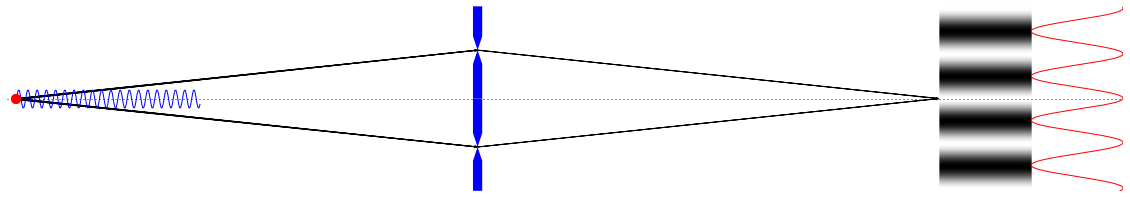

In [9]:
interact(lambda position,intensity,baseline,wavelength:
            double_slit(p0=[0,position],a0=[1,intensity],baseline=baseline,wavelength=wavelength),
         position=(-1,1,.01),intensity=(.2,1,.01),baseline=(0.1,2,.01),wavelength=(.01,.2,.01)) and None

So we can already use our double-slit box to infer something about the structure of the light source. Note that with two sources of equal intensity, it is possible to have the interference pattern almost cancel out on any one baseline -- but never on all baselines at once:

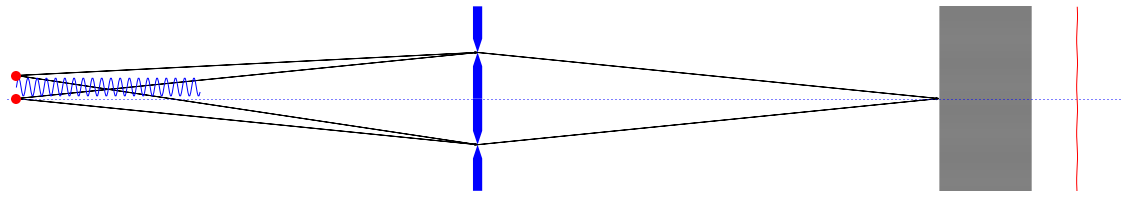

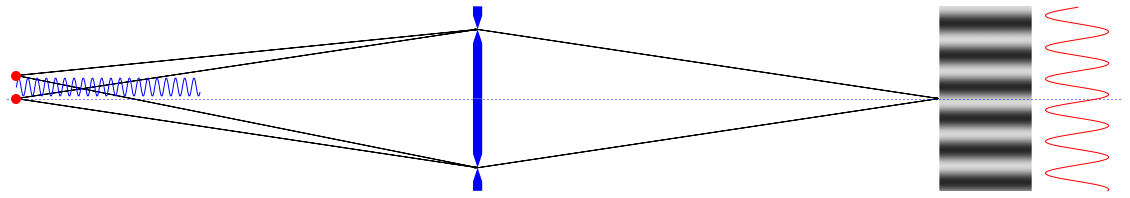

In [10]:
double_slit(p0=[0,0.25],baseline=1,wavelength=0.1)
double_slit(p0=[0,0.25],baseline=1.5,wavelength=0.1)

Now, let us simulate an extended source, by giving the simulator an array of closely spaced point-like sources. Try playing with the extent slider. What's happening here is that the many interference patterns generated by each little part of the extended source tend to "wash out" each other, resulting in a net loss of amplitude in the pattern. Note also how each particular baseline length is sensitive to a particular range of source sizes.

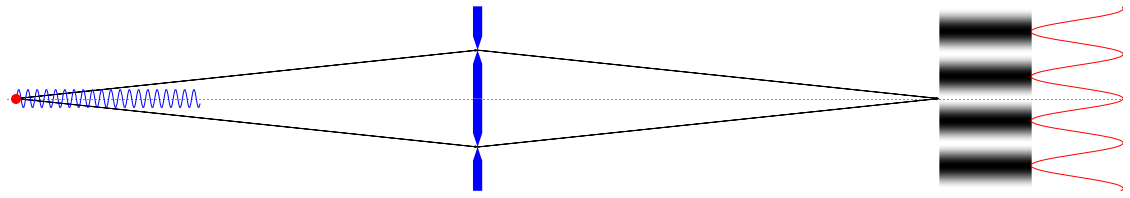

In [11]:
interact(lambda extent,baseline,wavelength:
             double_slit(p0=np.arange(-extent,extent+.01,.01),baseline=baseline,wavelength=wavelength),
         extent=(0,1,.01),baseline=(0.1,2,.01),wavelength=(.01,.2,.01)) and None

We can therefore measure source size by measuring the reduction in the amplitude of the interference pattern:

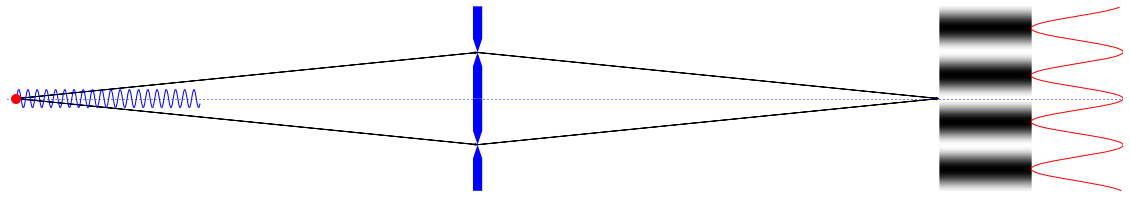

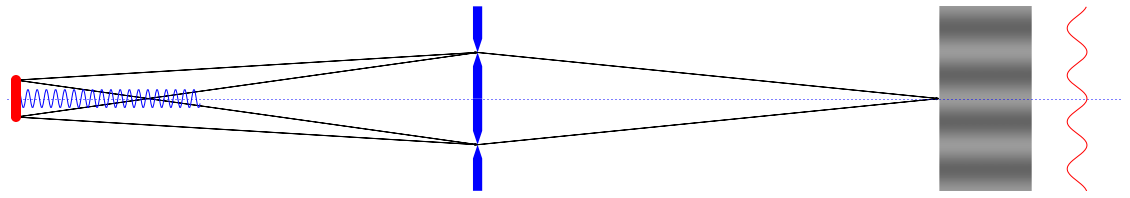

In [12]:
double_slit(p0=[0],baseline=1,wavelength=0.1)
double_slit(p0=np.arange(-0.2,.21,.01),baseline=1,wavelength=0.1)

In fact historically, this was the first application of interferometry in astronomy. In a famous experiment in 1920, a *Michelson interferometer* installed at Mount Wilson Observatory was used to measure the diameter of the red giant star Betelgeuse. 

***

<div class=advice>
The historical origins of the term <em><b>visibility</b></em>, which you will become intimately familiar with in the course of these lectures, actually lie in the experiment described above. Originally, "visibility" was defined as just that, i.e. a measure of the contrast between the light and dark stripes of the interference pattern.
</div>

<div class=advice>
Modern interferometers deal in terms of <em><b>complex visibilities</b></em>, i.e. complex quantitities. The amplitude of a complex visibility, or <em>visibility amplitude</em>, corresponds to the intensity of the interference pattern, while the <em>visibility phase</em> corresponds to its relative phase (in our simulator, this is the phase of the fringe at the centre of the screen). This one complex number is all the information we have about the light source. Note that while our double-slit experiment shows an entire pattern, the variation in that pattern across the screen is entirely due to the geometry of the "box" (generically, this is the instrument used to make the measurement) -- the informational content, as far as the light source is concerned, is just the amplitude and the phase!
</div>

<div class=advice>
In the single-source simulations above, you can clearly see that amplitude encodes source shape (and intensity), while phase encodes source position. <b>Visibility phase measures position, amplitude measures shape and intensity.</b> This is a recurring theme in radio interferometry, one that we'll revisit again and again in subsequent lectures.  
</div>

***

Note that a size measurement is a lot simpler than a position measurement. The phase of the fringe pattern gives us a very precise measurement of the position of the source *relative to the optical axis of the instrument*. To get an absolute position, however, we would need to know where the optical axis is pointing in the first place -- for practical reasons, the precision of this is a lot less. The amplitude of the fringe partern, on the other hand, is not very sensitive to errors in the instrument pointing. It is for this reason that the first astronomical applications of interferometry dealt with size measurements.


#### 1.9.4.3 Measuring instrument geometry

Until now, we've only been concerned with measuring source properties. Obviously, the interference pattern is also quite sensitive to instrument geometry. We can easily see this in our toy simulator, by playing with the position of the slits and the screen:

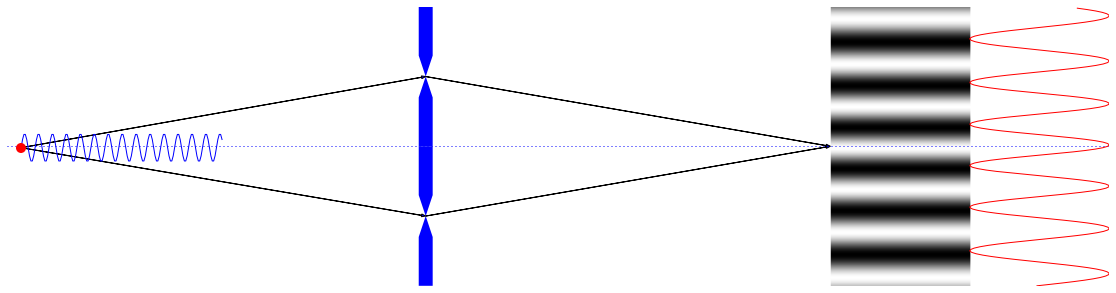

In [13]:
interact(lambda d1,d2,position,extent: double_slit(p0=np.arange(position-extent,position+extent+.01,.01),d1=d1,d2=d2),
         d1=(1,5,.1),d2=(1,5,.1),
         position=(-1,1,.01),extent=(0,1,.01)) and None

This simple fact has led to many other applications for interferometers, from geodetic VLBI (where continental drift is measured by measuring extremely accurate antenna positions via radio interferometry of known radio sources), to the recent gravitational wave detection by LIGO (where the light source is a laser, and the interference pattern is used to measure miniscule distortions in space-time -- and thus the geometry of the interferometer -- caused by gravitational waves).

### 1.9.5 Practical interferometers

If you were given the job of constructing an interferometer for astronomical measurements, you would quickly find that the double-slit experiment does not translate into a very practical design. The baseline needs to be quite large; a box with slits and a screen is physically unwieldy. A more viable design can be obtained by playing with the optical path.

The basic design still used in optical interferometry to this day is the *Michelson stellar interferometer* mentioned above. This is schematically laid out as follows:

<IMG SRC="figures/471px-Michelson_stellar_interferometer.svg.png" width="50%"/>
**Figure 1.9.2:** *Schematic of a Michelson interferometer. Credit: Unknown.*

The outer set of mirrors plays the role of slits, and provides a baseline of length $d$, while the rest of the optical path serves to bring the two wavefronts together onto a common screen. The first such interferometer, used to carry out the Betelgeuse size measurement, looked like this:

<IMG SRC="figures/Hooker_interferometer.jpg" width="50%"/>
**Figure 1.9.3:** *100-inch Hooker Telescope at Mount Wilson Observatory in southern California, USA. Credit: Unknown.*

In modern optical interferometers using the Michelson layout, the role of the "outer" mirrors is played by optical telescopes in their own right. For example, the Very Large Telescope operated by ESO can operate as an inteferometer, combining four 8.2m and four 1.8m individual telescopes:

<IMG SRC="figures/Hard_Day's_Night_Ahead.jpg" width="100%"/>
**Figure 1.9.4:** *The Very Large Telescope operated by ESO. Credit: European Southern Observatory.*

In the radio regime, the physics allow for more straightforward designs. The first radio interferometric experiment was the sea-cliff interferometer developed in Australia during 1945-48. This used reflection off the surface of the sea to provide a "virtual" baseline, with a single antenna measuring the superimposed signal:

<IMG SRC="figures/sea_int_medium.jpg" width="50%"/>
**Figure 1.9.5:** *Schematic of the sea-cliff single antenna interferometer developed in Australia post-World War 2. Credit: Unknown.*

In a modern radio interferometer, the "slits" are replaced by radio dishes (or collections of antennas called *aperture arrays*) which sample and digitize the incoming wavefront. The part of the signal path between the "slits" and the "screen" is then completely replaced by electronics. The digitized signals are combined in a *correlator*, which computes the corresponding complex visibilities. We will study the details of this process in further lectures. 

In contrast to the delicate optical path of an optical interferometer, digitized signals have the advantage of being endlessly and losslessly replicatable. This has allowed us to construct entire intererometric *arrays*. An example is the the Jansky Very Large Array (JVLA, New Mexico, US) consisting of 27 dishes:

<IMG SRC="figures/USA.NM.VeryLargeArray.02.jpg" width="50%"/>
**Figure 1.9.6:** *Telescope elments of the Jansky Very Large Array (JVLA) in New Mexico, USA. Credit: Unknown.*

The MeerKAT telescope coming online in the Karoo, South Africa, will consist of 64 dishes. This is an aerial photo showing the dish foundations being prepared:

<IMG SRC="figures/2014_core_02.jpg" width="50%"/>
**Figure 1.9.7:** *Layout of the core of the MeerKAT array in the Northern Cape, South Africa. Credit: Unknown.*

In an interferometer array, each pair of antennas forms a different baseline. With $N$ antennas, the correlator can then simultaneously measure the visibilities corresponding to $N(N-1)/2$ baselines, with each pairwise antenna combination yielding a unique baseline.

#### 1.9.5.1 Additive vs. multiplicative interferometers

The double-slit experiment, the Michelson interferometer, and the sea-cliff interferometer are all examples of *additive* interferometers, where the fringe pattern is formed up by adding the two interfering signals $E_1$ and $E_2$:

$$
EE^* = (E_1+E_2)(E_1+E_2)^* = E_1 E_1^* + E_2 E_2^* + E_1 E_2^* + E_2 E_1^* 
$$

As we already discussed above, the first two terms in this sum are constant (corresponding to the total intensity of the two signals), while the cross-term $E_1 E_2^*$ and its complex conjugate is the *interfering* term that is responsible for fringe formation. 

Modern radio interferometers are *multiplicative*. Rather than adding the signals, the antennas measure $E_1$ and $E_2$ and feed these measurements into a *cross-correlator*, which directly computes the $E_1 E_2^*$ term.  


### 1.9.6 Aperture synthesis vs. targeted experiments

Interferometry was born as a way of conducting specific, targeted, and rather exotic experiments. The 1920 Betelgeuse size measurement is a typical example. In contrast to a classical optical telescope, which could directly obtain an image of the sky containing information on hundreds to thousands of objects, an interferometer was a very delicate apparatus for indirectly measuring a single physical quantity (the size of the star in this case). The spatial resolution of that single measurement far exceeded anything available to a conventional telescope, but in the end it was always a specific, one-off measurement. The first interferometers were not capable of directly imaging the sky at that improved resolution.

In radio interferometry, all this changed in the late 1960s with the development of the *aperture synthesis* technique by Sir Martin Ryle's group in Cambridge. The crux of this tehnique lies in combining the information from multiple baselines. 

To understand this point, consider the following. As you saw from playing with the toy double-slit simulator above, for each baseline length, the interference pattern conveys a particular piece of information about the sky. For example, the following three "skies" yield exactly the same interference pattern on a particular baseline, so a single measurement would be unable to distinguish between them:

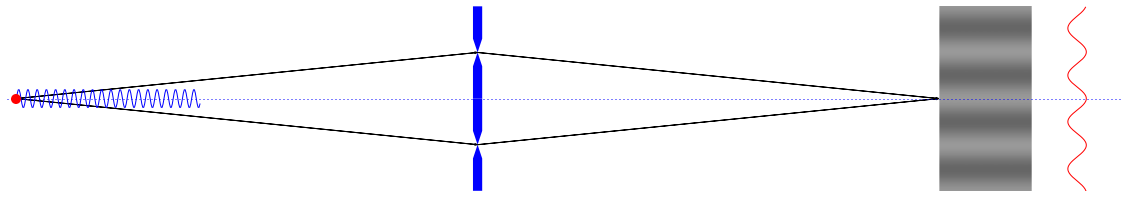

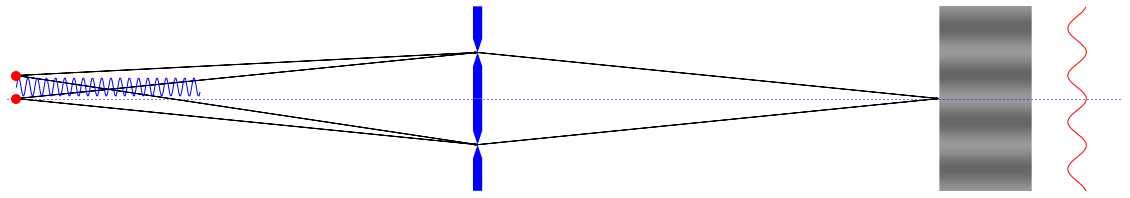

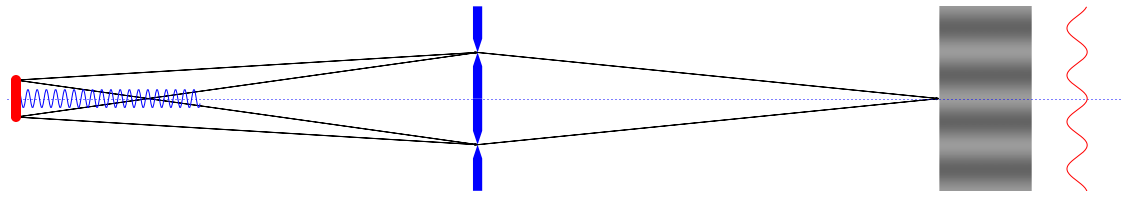

In [14]:
double_slit(p0=[0], a0=[0.4], maxint=2)
double_slit(p0=[0,0.25], a0=[1, 0.6], maxint=2)
double_slit(p0=np.arange(-0.2,.21,.01), a0=.05, maxint=2)

However, as soon as we take a measurement on another baseline, the difference becomes apparent:

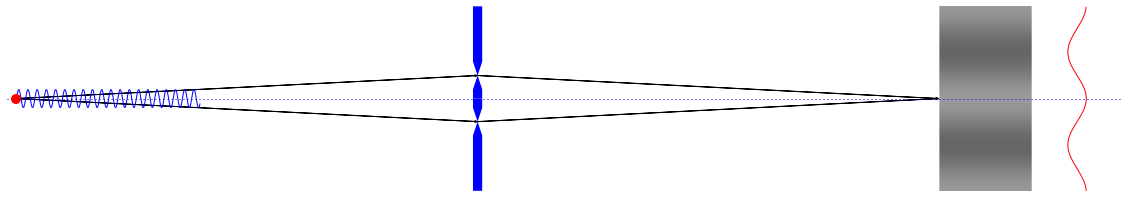

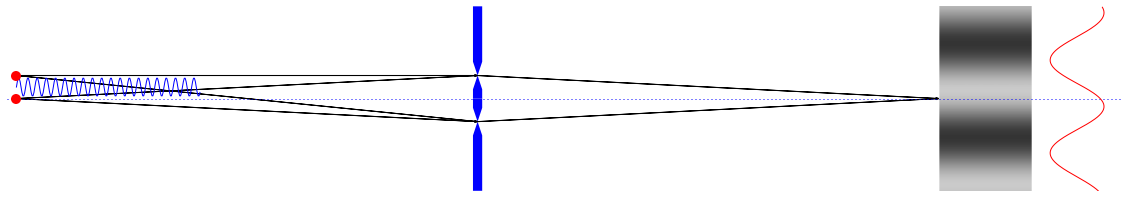

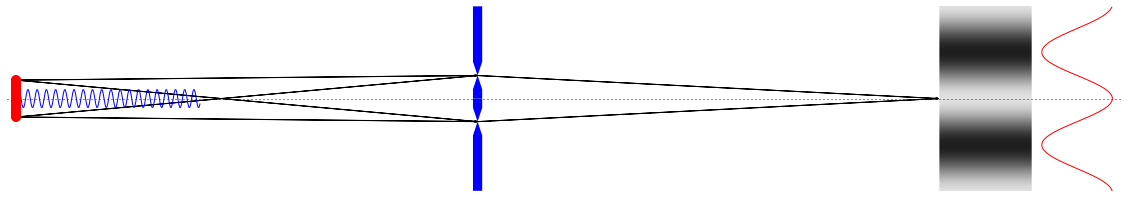

In [15]:
double_slit(p0=[0], a0=[0.4], baseline=0.5, maxint=2)
double_slit(p0=[0,0.25], a0=[1, 0.6], baseline=0.5, maxint=2)
double_slit(p0=np.arange(-0.2,.21,.01), a0=.05,  baseline=0.5, maxint=2)

With a larger number of baselines, we can gather enough information to reconstruct an image of the sky. This is because each baseline essentially measures one *Fourier component* of the sky brightness distribution (Chapter 4 will explain this in more detail); and once we know the Fourier components, we can compute a Fourier transform in order to recover the sky image. The advent of sufficiently powerful computers in the late 1960s made this technique practical, and turned radio interferometers from exotic contraptions into generic imaging instruments. With a few notable exceptions, modern radio interferometry ***is*** aperture synthesis.

This concludes our introduction to radio interferometry; the rest of this course deals with aperture synthesis in detail. The remainder of this notebook consists of a few more interactive widgets that you can use to play with the toy dual-slit simulator.

### Appendix: Recreating the Michelson interferometer
For completeness, let us modify the function above to make a more realistic interferometer. We'll im plement two changes:

* we'll put the light source infinitely far away, as an astronomical source should be

* we'll change the light path to mimic the layout of a Michelson interferometer.

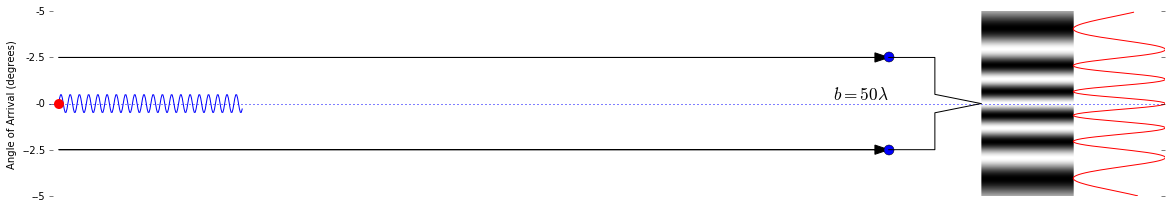

visibility (Imax-Imin)/(Imax+Imin):  0.999995893582


In [16]:
def michelson (p0=[0],a0=[1],baseline=50,maxbaseline=100,extent=0,d1=9,d2=1,d3=.2,wavelength=.1,fov=5,maxint=None):
    """Renders a toy Michelson interferometer with an infinitely distant (astronomical) source
    'p0' is a list or array of source positions (as angles, in degrees).
    'a0' is an array of source intensities 
    'extent' are source extents, in degrees
    'baseline' is the baseline, in lambdas
    'maxbaseline' is the max baseline to which the plot is scaled 
    'd1' is the plotted distance between the "sky" and the interferometer arms
    'd2' is the plotted distance between arms and screen, in plot units
    'd3' is the plotted distance between inner mirrors, in plot units
    'fov' is the notionally rendered field of view radius (in degrees)
    'wavelength' is wavelength, used for scale
    'maxint' is the maximum intensity scale use to render the fringe pattern. If None, the pattern
       is auto-scaled. Maxint is useful if you want to render fringes from multiple invocations
       of michelson() into the same intensity scale, i.e. for comparison.
    """
    ## setup figure and axes
    plt.figure(figsize=(20, 5))
    plt.axes(frameon=False)
    plt.xlim(-d1-.1, d2+2) and plt.ylim(-1, 1)
    plt.xticks([]) 
    # label Y axis with degrees
    yt,ytlab = plt.yticks()
    plt.yticks(yt,["-%g"%(float(y)*fov) for y in yt]) 
    plt.ylabel("Angle of Arrival (degrees)")
    plt.axhline(0, ls=':')
    ## draw representation of arms and light path
    maxbaseline = max(maxbaseline,baseline)
    bl2 = baseline/float(maxbaseline)    # coordinate of half a baseline, in plot units
    plt.plot([0,0],[-bl2,bl2], 'o', ms=10)
    plt.plot([0,d2/2.,d2/2.,d2],[-bl2,-bl2,-d3/2.,0],'-k')
    plt.plot([0,d2/2.,d2/2.,d2],[ bl2, bl2, d3/2.,0],'-k')
    plt.text(0,0,'$b=%d\lambda$'%baseline, ha='right', va='bottom', size='xx-large')
    ## draw representation of sinewave from the central position
    if isinstance(p0,(int,float)):
        p0 = [p0]
    xw = np.arange(-d1, -d1+(d1+d2)/4, .01)
    yw = np.sin(2*np.pi*xw/wavelength)*.1 + (p0[0]+p0[-1])/(2.*fov)
    plt.plot(xw,yw,'b')
    ## 'xs' is a vector of x cordinates on the screen
    xs = np.arange(-1, 1, .01) 
    ## xsdiff is corresponding pathlength difference
    xsdiff = (np.sqrt(d2**2 + (xs-d3)**2) - np.sqrt(d2**2 + (xs+d3)**2))
    ## and we accumulate the interference pattern for each source into 'pattern'
    pattern = 0
    total_intensity = 0
    ## compute contribution to pattern from each source position p
    for pos,ampl in np.broadcast(p0,a0):
        total_intensity += ampl
        pos1 = pos/float(fov)
        if extent:  # simulate extent by plotting 100 sources of 1/100th intensity
            positions = np.arange(-1,1.01,.01)*extent/fov + pos1 
        else:
            positions = [pos1]
        # draw arrows indicating lightpath
        plt.arrow(-d1, bl2+pos1, d1, -pos1, head_width=.1, fc='k', length_includes_head=True)
        plt.arrow(-d1,-bl2+pos1, d1, -pos1, head_width=.1, fc='k', length_includes_head=True)
        for p in positions:
            # compute the pathlength difference between slits and position on screen
            plt.plot(-d1, p, marker='o', ms=10*ampl, mfc='red', mew=0)
            # add pathlength difference at slits
            diff = xsdiff + (baseline*wavelength)*np.sin(p*fov*np.pi/180)
            # accumulate interference pattern from this source
            pattern = pattern + (float(ampl)/len(positions))*np.cos(2*np.pi*diff/wavelength) 
    maxint = maxint or total_intensity
    # add fake axis to interference pattern just to make it a "wide" image
    pattern_image = pattern[:,np.newaxis] + np.zeros(10)[np.newaxis,:]
    plt.imshow(pattern_image, extent=(d2,d2+1,-1,1), cmap=plt.gray(), vmin=-maxint, vmax=maxint)
    # make a plot of the interference pattern
    plt.plot(d2+1.5+pattern/(maxint*2), xs, 'r')
    plt.show()
    print "visibility (Imax-Imin)/(Imax+Imin): ",(pattern.max()-pattern.min())/(total_intensity*2)
# show patern for one source at 0
michelson(p0=[0])

We have modified the setup as follows. First, the source is now infinitely distant, so we define the source position in terms of the angle of arrival of the incoming wavefront (with 0 meaning on-axis, i.e. along the vertical axis). We now define the baseline in terms of wavelengths. The *phase difference* of the wavefront arriving at the two arms of the interferometer is completely defined in terms of the angle of arrival. The two "rays" entering the outer arms of the interferometer indicate the angle of arrival.

The rest of the optical path consists of a series of mirrors to bring the two signals together. Note that the *frequency* of the fringe pattern is now completely determined by the internal geometry of the instrument (i.e. the distances between the inner set of mirrors and the screen); however the relative *phase* of the pattern is determined by source angle. Use the sliders below to get a feel for this.

Note that we've also modified the function to print the "visibility", as originally defined by Michelson.

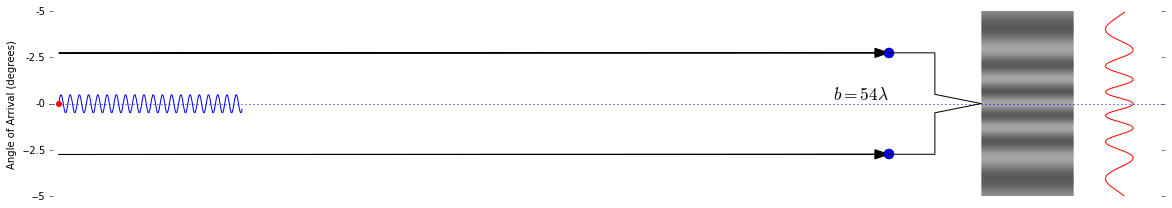

visibility (Imax-Imin)/(Imax+Imin):  0.999862783116


In [17]:
# single source
interact(lambda position, intensity, baseline: 
             michelson(p0=[position], a0=[intensity], baseline=baseline, maxint=2),
         position=(-5,5,.01),intensity=(.2,1,.01),baseline=(10,100,.01)) and None

And here's the same experiment for two sources:

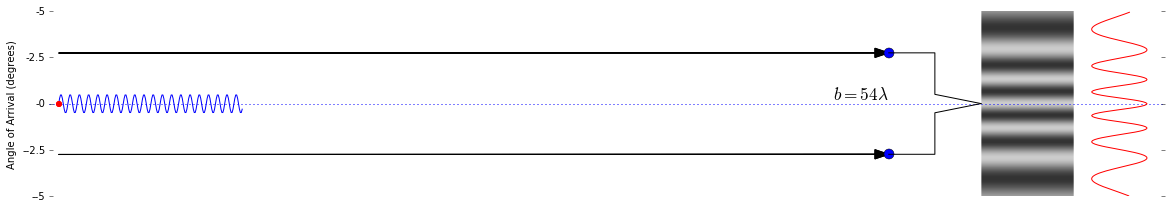

visibility (Imax-Imin)/(Imax+Imin):  0.999862783116


In [18]:
interact(lambda position1,position2,intensity1,intensity2,baseline: 
            michelson(p0=[position1,position2], a0=[intensity1,intensity2], baseline=baseline, maxint=2),
         position1=(-5,5,.01), position2=(-5,5,.01), intensity1=(.2,1,.01), intensity2=(.2,1,.01),
         baseline=(10,100,.01)) and None

#### A.1 The Betelgeuse size measurement
For fun, let us use our toy to re-create the Betelgeuse size measurement of 1920 by A.A. Michelson and F.G. Pease. Their experiment was set up as follows. The interferometer they constructed had movable outside mirrors, giving it a baseline that could be adjusted from a maximum of 6m downwards. Red light has a wavelength of ~650n; this gave them a maximum baseline of 10 million wavelengths.

For the experiment, they started with a baseline of 1m (1.5 million wavelengths), and verified that they could see fringes from Betelguese with the naked eye. They then adjusted the baseline up in small increments, until at 3m the fringes disappeared. From this, they inferred the diameter of Betelgeuse to be about 0.05".

You can repeat the experiment using the sliders below. You will probably find your toy Betelegeuse to be somewhat larger than 0.05". This is because or simulator is too simplistic -- in particular, it assumes a monochromatic source of light, which makes the fringes a lot sharper.

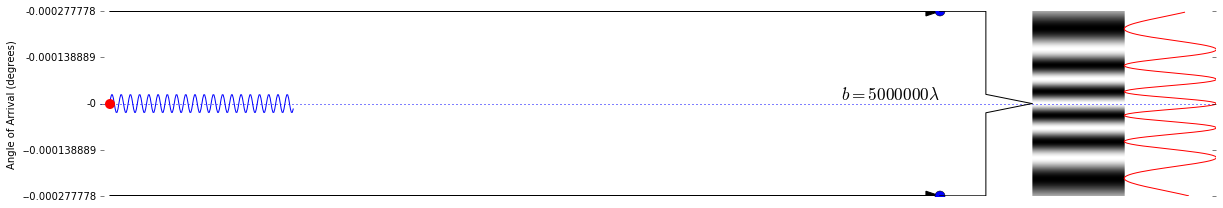

visibility (Imax-Imin)/(Imax+Imin):  0.999995893582


In [19]:
arcsec = 1/3600.
interact(lambda extent_arcsec, baseline: 
             michelson(p0=[0], a0=[1], extent=extent_arcsec*arcsec, maxint=1, 
                       baseline=baseline,fov=1*arcsec),
         extent_arcsec=(0,0.1,0.001), 
         baseline=(1e+4,1e+7,1e+4)
        ) and None

***

* Next: [1.10 The Limits of Single Dish Astronomy](01_09_a_brief_introduction_to_interferometry.ipynb)